In [1]:
import sys
import numpy as np
from skimage import data,io,filters,transform
from matplotlib import pyplot
from matplotlib.colors import hsv_to_rgb

In [2]:
def rotate_point(cx, cy, angle, p):
    s = np.sin(angle);
    c = np.cos(angle);
    x = p[0]
    y = p[1]
    
    # translate point back to origin:
    x -= cx;
    y -= cy;

    # rotate point
    xnew =  x * c - y * s
    ynew =  x * s + y * c

    # translate point back
    x = int(xnew + cx)
    y = int(ynew + cy)
    return x,y


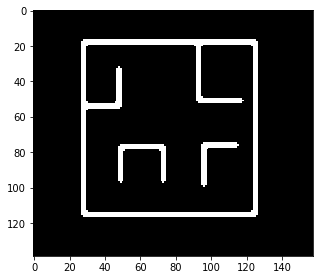

c:\users\erics\appdata\local\programs\python\python39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


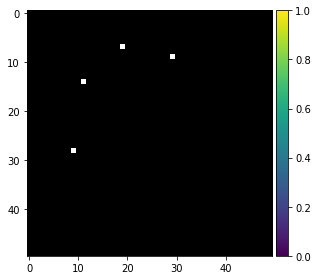

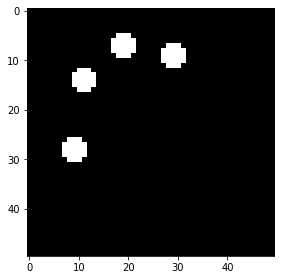

In [14]:
true_map = io.imread('true_map.jpg')
blurred = np.floor(np.clip(filters.gaussian(true_map, sigma=(1, 1), multichannel=True)*10,0,1.5))
io.imshow(blurred)
io.show()

#test_map = io.imread('dat4.jpg')
test_map = np.zeros((50,50,3))
points = [(10,17), (10,31), (17,9), (27,9)]
r = 10/360*2*np.pi
for p in points:
    x,y = rotate_point(25,25,r,p)
    test_map[y,x] = (1.0,1.0,1.0)
    
io.imshow(test_map)
io.show()

test_map = np.floor(np.clip(filters.gaussian(test_map, sigma=(1.5, 1.5), multichannel=True)*50,0,1.5))

io.imshow(test_map)
io.show()


In [4]:
def least_squares(img_a, img_b):
    height_a, width_a, depth_a = img_a.shape
    height_b, width_b, depth_b = img_b.shape
    if not (height_a == height_b and width_a == width_b):
        raise Exception('images must be same dims')
    total = 0
    
    lsqe_map = np.zeros((height_a, width_a, 1))
    
    for x in range(width_a):
        for y in range(height_a):
            #print(img_b[y,x,0])
            #v = (img_a[y,x,0] - img_b[y,x,0])**2
            if (img_a[y,x,0] + img_b[y,x,0]) > 1.5:
                v = 1
            else:
                v = 0
            lsqe_map[y,x] = v
            total += v
            
    #io.imshow(lsqe_map)
    #io.show()
    return total
        

def least_squares_norm(img_a, img_b):
    height_a, width_a, depth_a = img_a.shape
    return least_squares(img_a,img_b)/(height_a*width_a)

-15
-10
-5
0
5
10
15


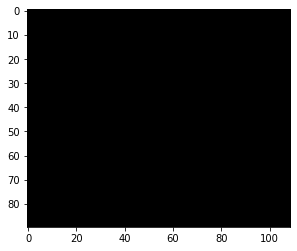

In [5]:

height_map, width_map, depth_map = true_map.shape
height, width, depth = test_map.shape


DECIMATE = 1

lsqe_map = np.zeros((int((height_map-height)/DECIMATE+1), int((width_map-width)/DECIMATE+1), 360))
lsqe_map_hsv = np.zeros((int((height_map-height)/DECIMATE+1), int((width_map-width)/DECIMATE+1), 3))


angles = [-15,-10,-5,0,5,10,15]
for angle in angles:
    print(angle)
    T=transform.rotate(test_map,angle)
    for x in range(0,width_map-width+1,DECIMATE):
        for y in range(0,height_map-height+1,DECIMATE):
            crop = blurred[y:(y+height), x:(x+width)]
            v = least_squares_norm(crop, T)
            #print(v)
            lsqe_map[int(y/DECIMATE),int(x/DECIMATE), int((angle+360)%360)] = v

#for x in range(0,width_map-width+1,DECIMATE):
#    for y in range(0,height_map-height+1,DECIMATE):
#        min_ang = np.argmin(np.ma.masked_where(lsqe_map[int(y/DECIMATE),int(x/DECIMATE)]==0, lsqe_map[int(y/DECIMATE),int(x/DECIMATE)]))
        #print(min_ang)
#        lsqe_map_hsv[int(y/DECIMATE),int(x/DECIMATE)] = [min_ang/360, np.max([1-10*lsqe_map[int(y/DECIMATE),int(x/DECIMATE),min_ang],0]), 1-np.min([20*lsqe_map[int(y/DECIMATE),int(x/DECIMATE),min_ang],1])]
        
        

pyplot.imshow(hsv_to_rgb(lsqe_map_hsv))
pyplot.show()

In [6]:
max_term = np.unravel_index(np.argmax(np.ma.masked_where(lsqe_map==0, lsqe_map)), lsqe_map.shape)
circle = (int(max_term[0]+height/2), int(max_term[1]+width/2),max_term[2])
print(max_term)
print(circle)

(46, 19, 10)
(71, 44, 10)


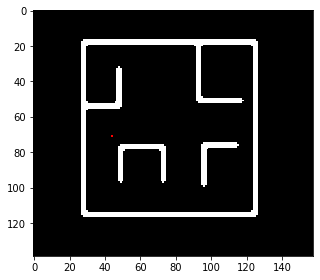

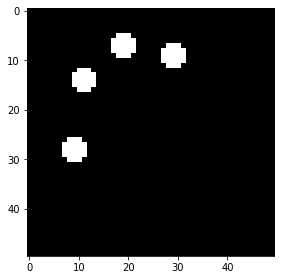

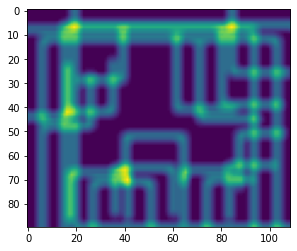

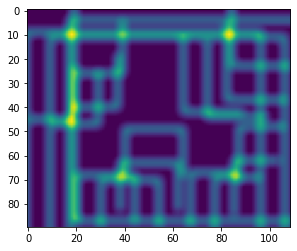

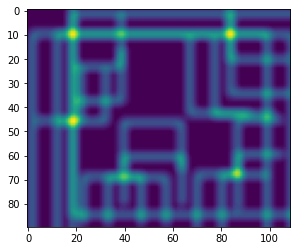

In [7]:
for x in range(0,width_map-width+1,DECIMATE):
    for y in range(0,height_map-height+1,DECIMATE):
        min_ang = np.argmax(np.ma.masked_where(lsqe_map[int(y/DECIMATE),int(x/DECIMATE)]==0, lsqe_map[int(y/DECIMATE),int(x/DECIMATE)]))
        #print(min_ang)
        lsqe_map_hsv[int(y/DECIMATE),int(x/DECIMATE)] = [min_ang/360, np.max([1-10*lsqe_map[int(y/DECIMATE),int(x/DECIMATE),min_ang],0]), 1-np.min([1*lsqe_map[int(y/DECIMATE),int(x/DECIMATE),min_ang],1])]
        
map_disp = blurred
map_disp[circle[0:2]] = [1,0,0]
        
io.imshow(map_disp)
io.show()

io.imshow(test_map)
io.show()

display = hsv_to_rgb(lsqe_map_hsv)
display[max_term[0:2]] = [1,1,1]

pyplot.imshow(lsqe_map[:,:,-10])
pyplot.show()
pyplot.imshow(lsqe_map[:,:,0])
pyplot.show()
pyplot.imshow(lsqe_map[:,:,10])
pyplot.show()

-15 (26, 5) 0.0132


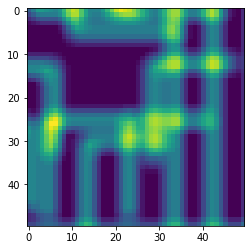

-10 (27, 6) 0.0132


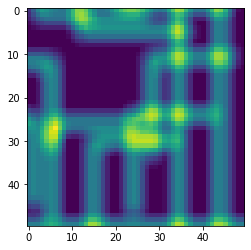

-5 (28, 25) 0.0144


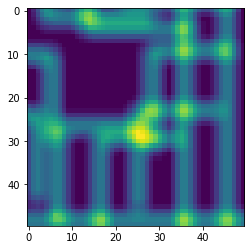

0 (28, 26) 0.018


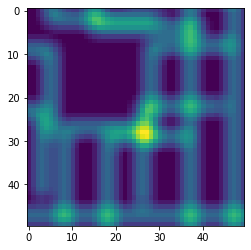

5 (28, 27) 0.0204


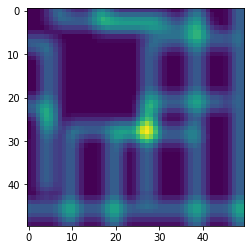

10 (27, 27) 0.0204


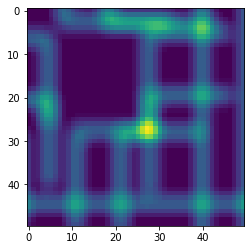

15 (27, 28) 0.0188


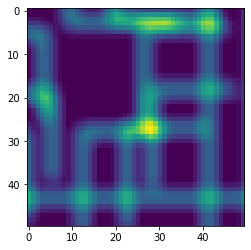

In [13]:
for a in angles:
    ROI = lsqe_map[-50:,-50:,a]
    center = np.unravel_index(np.argmax(np.ma.masked_where(ROI==0, ROI)), ROI.shape)
    print(a, center, ROI[center])
    pyplot.imshow(ROI)
    pyplot.show()